# Regression

Regression is a group of techniques used to predict a dependent variable based upon one or more independent variables.
There are many types of regression analysis, but they all have the same end goal.
### Some of the most used types are:
- Linear
- Logistic
- Polynomial

### Regression works by:
choosing one dependent variable to predict, then analyze the correlation between this dependent variable and one or more independent variable.
A dependent variable is a variable which is effected by a change in a independent variable. Where an independent variable is not effected by a change in another variable.

### A classic regression analysis problem is:
predicting the value of a house based on variables such as:
- Size
- Year built
- Year renovated
- Number of floors
- Number of bedrooms
- etc.

In this example the dependent variable is the price since it is dependent on the other variables such as "size" and "number of bedrooms",
while the independent variables such as "Year built" is not effected by a change in the number of beds.

In a finished regression model you should be able to feed it a value for each variable and the model should spit out what it thinks will be the price of the house with those values.

# Layout:
The notebook starts with some basic "get to know the dataset" commands. Just to get a feel of what we are working with.

#### Data cleaning:
Then the data cleaning/ cleansing begins. This is where I remove columns I know will not be a part of the model, fix null-values, encode categorical values, and normalize attributes.
At first glance I couldn't see any attributes I know I should remove and therefor I wait with this step til after the Feature Correlation Analysis. The dataset didn't contain any null-values and
this step was then skipped. I changed the datatypes of the attributes Sex and Smoker to category, so I could then one-hot encode them.

#### EDA
Next comes the EDA.
First I begin with Feature Correlation Analysis. FCA is about using statistics and visual representations of the dataset to find correlations between the dependant variable (charges) and the independent variables, with the end goal
of determining which attributes should be a part of the final model.
The process of removing unwanted columns is known as Feature Selection and is an important part of creating a good ML Model. In this dataset I could see a clear correlation between most
independent variables and the dependent variable, except the variable children. I therefor see no reason for this variable to be kept in the dataset.

In [88]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [89]:
# Load dataset
df = pd.read_csv('insurance.csv')

## Data preprocessing

In [90]:
df.shape

(1338, 7)

In [91]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [93]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [94]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [95]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Cleaning the dataset

In [96]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [97]:
# Encoding to be represented by either ones or zeroes
df['sex'] = df['sex'].replace(['female', 'male'], [0,1])
df['smoker'] = df['smoker'].replace(['no', 'yes'], [0,1])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [98]:
# NEED TO: BIN AGE, BMI and CHARGES

def bins(df):
    pass

def min_max_normalizing(df):
    df_copy = df.copy()

    # df_copy['age'] = (df_copy['age'] - df_copy['age'].min()) / \
    #                   (df_copy['age'].max() - df_copy['age'].min())
    #
    # df_copy['bmi'] = (df_copy['bmi'] - df_copy['bmi'].min()) / \
    #                   (df_copy['bmi'].max() - df_copy['bmi'].min())

    df_copy['charges'] = (df_copy['charges'] - df_copy['charges'].min()) / \
                      (df_copy['charges'].max() - df_copy['charges'].min())

    return df_copy

# Z-score Normalizing
def z_score_normalizing(df):
    df_copy = df.copy()

    # df_copy['age'] = (df_copy['age'] - df_copy['age'].mean()) / df_copy['age'].std()
    # df_copy['bmi'] = (df_copy['bmi'] - df_copy['bmi'].mean()) / df_copy['bmi'].std()
    df_copy['charges'] = (df_copy['charges'] - df_copy['charges'].mean()) / df_copy['charges'].std()

    return df_copy

df_z_score = z_score_normalizing(df)

# df = min_max_normalizing(df)
#
# df

# EDA

## Feature Correlation Investigation

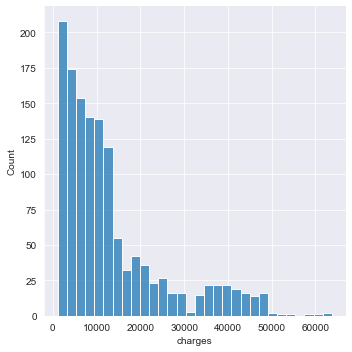

In [99]:
sns.displot(df, x=df['charges'])

In [100]:
df[['smoker', 'charges']].groupby(['smoker'], as_index=False).mean().sort_values(by='charges', ascending=False)

,smoker,charges
1,1,32050.231832
0,0,8434.268298


By the looks of it smoking has the biggest correlation with charges. This is quite self-explanatory. I'll explore this further with a distribution plot

C:\Users\marku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

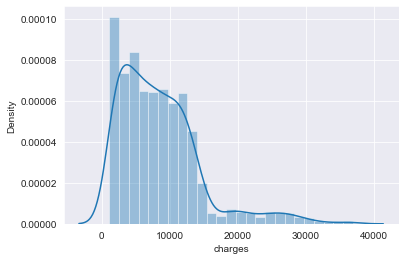

In [118]:
sns.distplot(df[(df.smoker == 0)]['charges'])

C:\Users\marku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

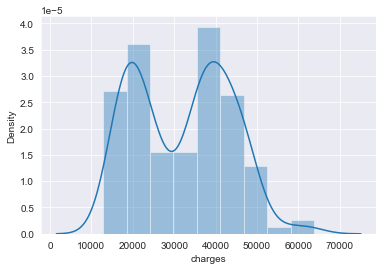

In [119]:
sns.distplot(df[(df.smoker == 1)]['charges'])

In [102]:
# NEED TO BIN BMI AND OR CHARGES
# df[['bmi', 'charges']].groupby(['sex'], as_index=False).mean().sort_values(by='charges', ascending=False)

In [103]:
df[['sex', 'charges']].groupby(['sex'], as_index=False).mean().sort_values(by='charges', ascending=False)

,sex,charges
1,1,13956.751178
0,0,12569.578844


As you can see there is a decent difference between Male(13956) and Female(12569).
From the data we have available this can come from mainly two different reasons:
- Men smoking more, which you will see raises the cost by a lot
- Men have a higher BMI, which you will see raises the cost by also a lot

In [104]:
df[['children', 'charges']].groupby(['children'], as_index=False).mean().sort_values(by='charges', ascending=False)

,children,charges
3,3,15355.318367
2,2,15073.563734
4,4,13850.656311
1,1,12731.171832
0,0,12365.975602
5,5,8786.035247


Here you can see that the number of children doesn't have a strong positive correlation with charges (if you look away from the outlier of 5 children). I think I can conclude with this not being an important variable for the cost, but will do further investigation. I will try to confirm this with a heatmap later on.

In [105]:
df[['region', 'charges']].groupby(['region'], as_index=False).mean().sort_values(by='charges', ascending=False)

,region,charges
2,southeast,14735.411438
0,northeast,13406.384516
1,northwest,12417.575374
3,southwest,12346.937377


While most regions have a somewhat same mean, the southeast takes a massive lead. This can come from a handful of different reasons.
As we explored earlier especially BMI and smoking raised the price of treatment by a lot. I will explore this more in the heatmap.

In [106]:
df['sex'] =  df['sex'].astype('category')
df['smoker'] =  df['smoker'].astype('category')
df.info()
df_encoded = pd.get_dummies(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   object  
 6   charges   1338 non-null   float64 
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 55.2+ KB


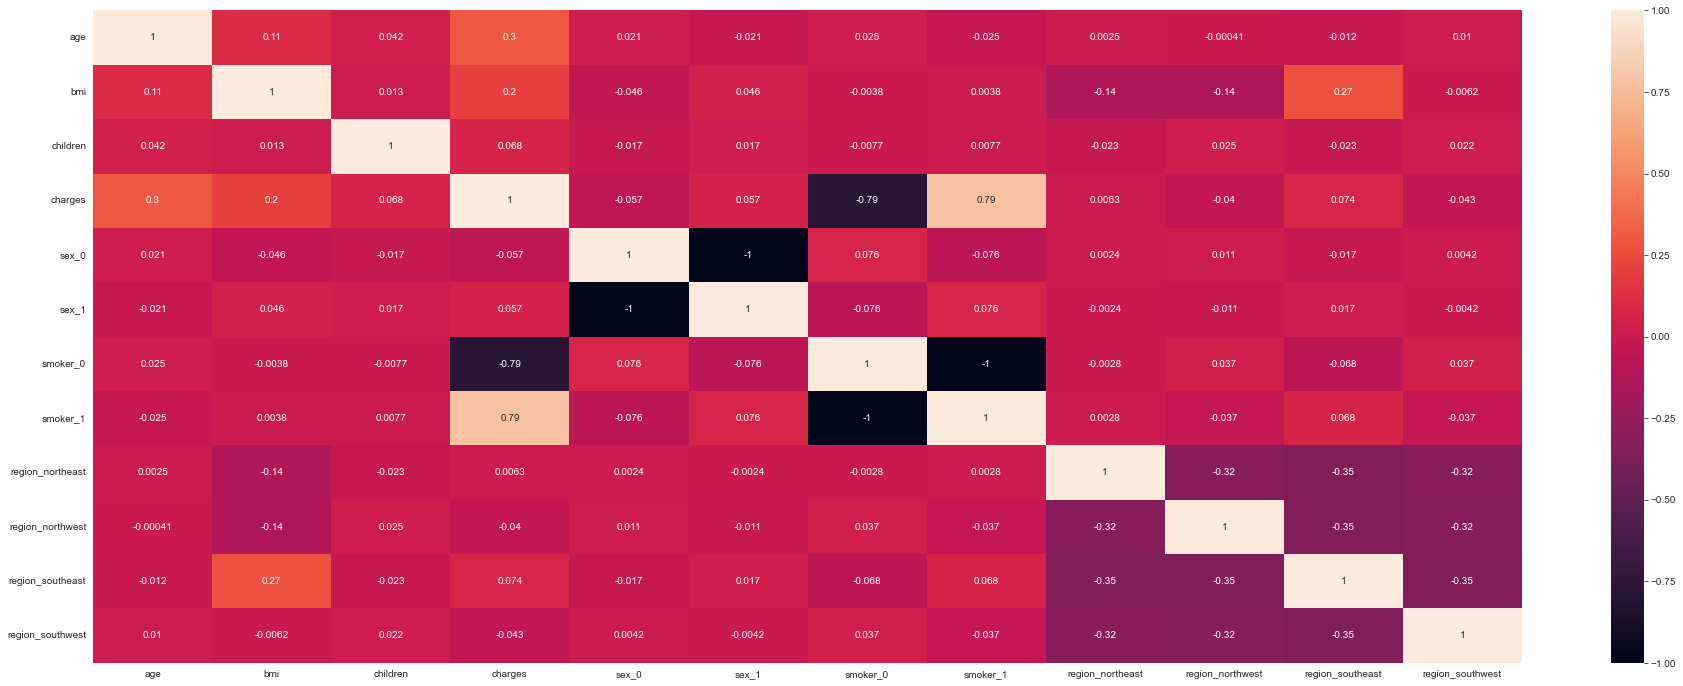

In [107]:
corr = df_encoded.corr()
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(corr, annot=True)

Distribution of age.

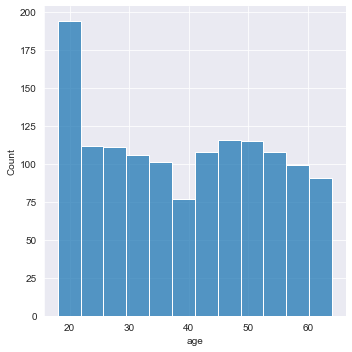

In [108]:
sns.displot(df, x=df['age'])

Distribution of age compared to charges. Here we can clearly see that the min charges raises as one gets older.

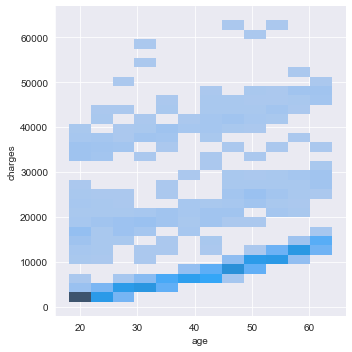

In [109]:
sns.displot(df, y=df['charges'], x=df['age'])

Distribution of BMI. Looks like the average BMI is around 30, which is considered overweight.

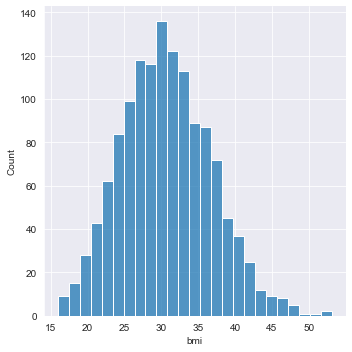

In [110]:
sns.displot(df, x=df['bmi'])

A good visualisation of charges compared to BMI.

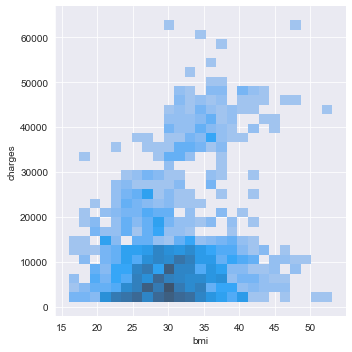

In [111]:
sns.displot(df, y=df['charges'], x=df['bmi'])

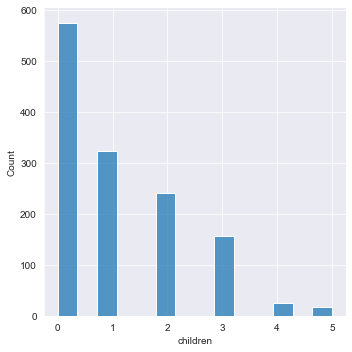

In [112]:
sns.displot(df, x=df['children'])